In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/Medical.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)


# Converting string in numbers

In [ ]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
region_map = {
    "northeast": 0,
    "northwest": 1,
    "southeast": 2,
    "southwest": 3
}
df['region'] = df['region'].map(region_map)

In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


| Feature      | Description                                                                                                                                                                                                                                                                                  |
| ------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **age**      | - Age ranges from **18 to 64**, with a **mean age \~39**.<br>- Spread is moderate (`std = 14.04`), indicating varied age distribution.<br>- 25% of individuals are under 27 years old.                                                                                                       |
| **sex**      | <br>- Almost evenly split (`mean ≈ 0.50`) between male and female.                                                                                                                                                                                   |
| **bmi**      | - Body Mass Index ranges from **15.96 to 53.13**, with a **mean of \~30.66** (slightly overweight/obese).<br>- 25% have BMI under 26.29; 75% under 34.70.                                                                                                                                    |
| **children** | - Number of children ranges from **0 to 5**, average is \~1.1.<br>- Half of the individuals have **0 or 1 child**.                                                                                                                                                                           |
| **smoker**   | <br>- Only **\~20% are smokers** (`mean = 0.204`), indicating class imbalance.                                                                                                                                                                 |
| **region**   | <br>- Average region value `1.51` implies fairly even distribution across 4 regions.                                                                                                                                                                             |
| **charges**  | - Insurance charges range widely: **\$1,122 to \$63,770**.<br>- Mean is **\~\$13,279**, but **high standard deviation (\~\$12,110)** suggests **some very high-cost outliers**.<br>- 75% of people pay under **\$16,657**, but max is far higher—indicating a **right-skewed distribution**. |


# Univariate Analysis

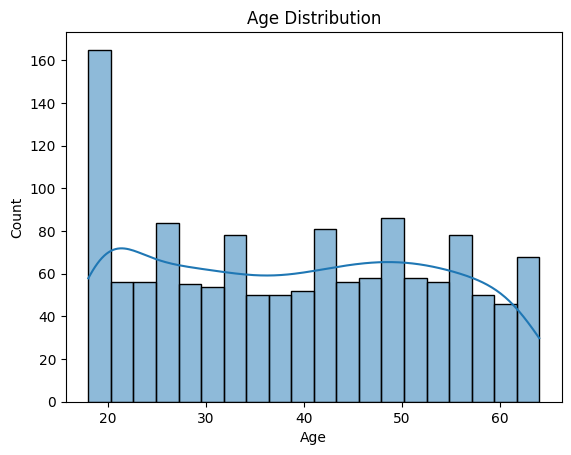

In [ ]:
# Histogram Age
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


#🔹 Age

*Range: 18 to 64 years

*Average Age: ~39 years

*Distribution: Fairly spread out across adult age groups

*Most common age group (25–50) indicates a working-age population.

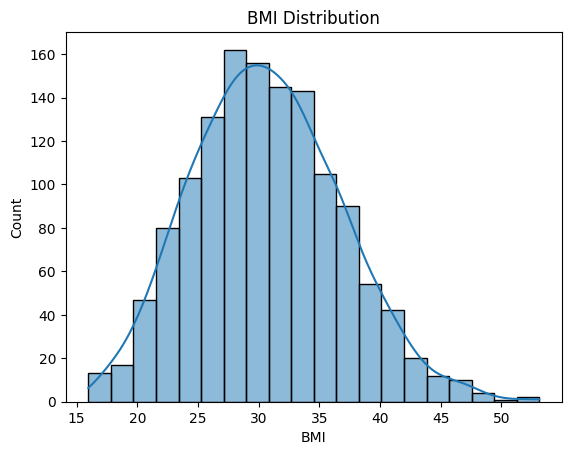

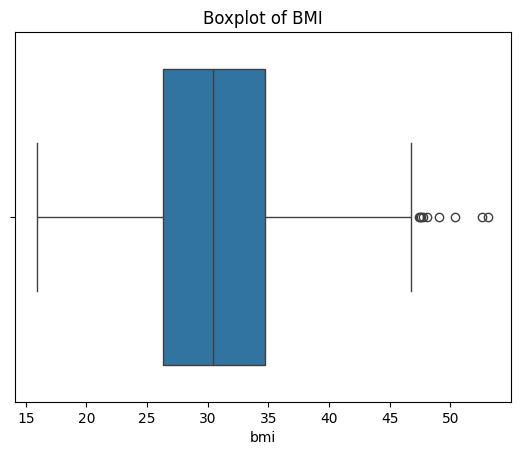

Obese individuals: 704


In [ ]:
# Histogram + KDE BMI
sns.histplot(df['bmi'], kde=True, bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')
plt.show()

# Optional: count obesity cases (bmi > 30)
print("Obese individuals:", (df['bmi'] > 30).sum())


#🔹 BMI (Body Mass Index)
Range: 15.96 to 53.13

Average BMI: ~30.66 (borderline obese)

Observation:

BMI > 30 suggests a significant number of individuals are obese.

Potential outliers beyond 40 (extremely high BMI) could impact regression.

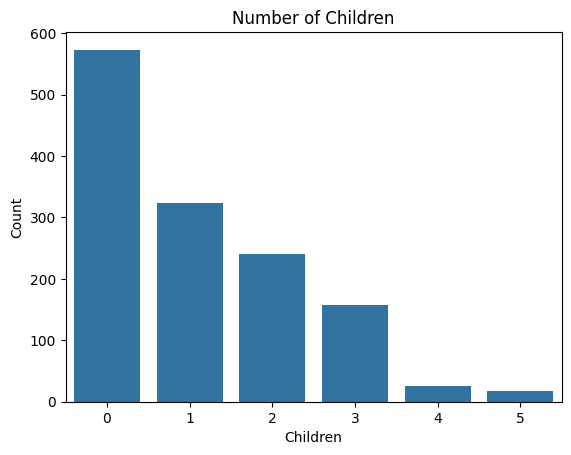

In [ ]:
# Barplot of frequency Children
sns.countplot(x=df['children'])
plt.title('Number of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()


#🔹 Children


* Range: 0 to 5 children

* Most common: 0 children (573 people)

* Distribution: Skewed towards fewer children—almost 67% have 0–1 child

* Interpretation: Most of the sample consists of smaller families or singles.

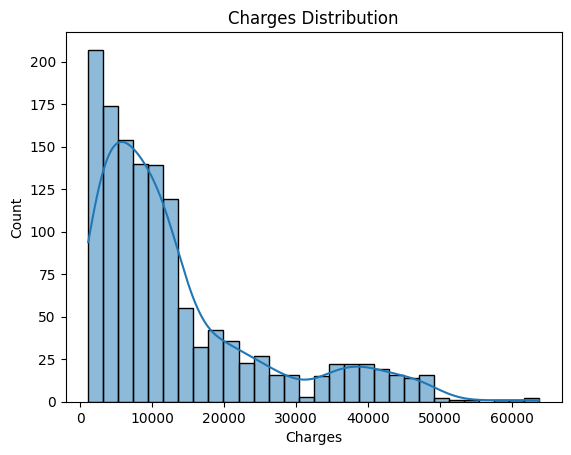

In [ ]:
# Histogram Charges
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.show()


#🔹 Charges (Insurance Cost)

* Range: $1,121 to $63,770

* Mean Charges: ~$13,279

* Distribution: Right-skewed, with many low-cost cases and a few very expensive ones

* Outliers: High charges likely associated with people who are older, have high BMI, or more health issues

# 🔗 Bivariate Analysis

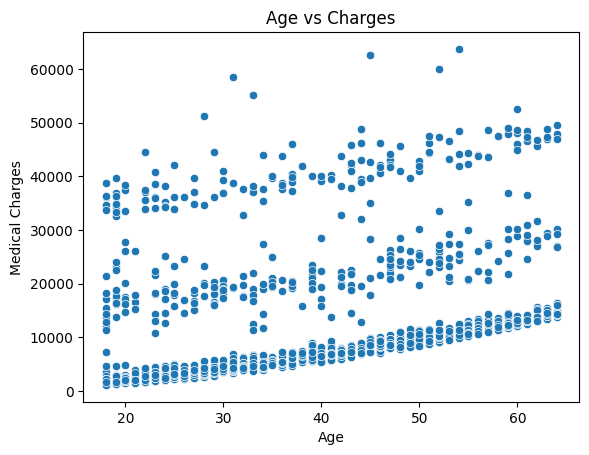

In [ ]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.show()


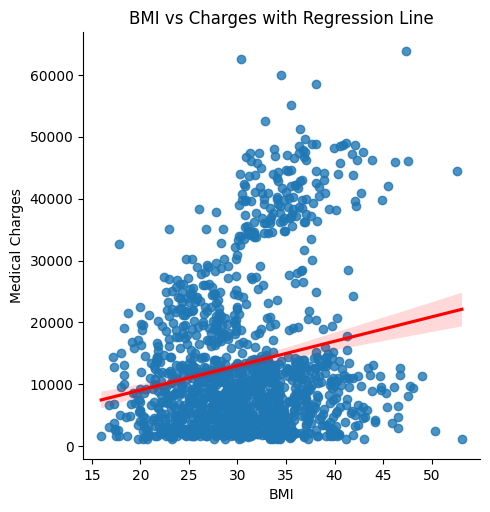

In [ ]:
sns.lmplot(x='bmi', y='charges', data=df, line_kws={'color': 'red'})
plt.title('BMI vs Charges with Regression Line')
plt.xlabel('BMI')
plt.ylabel('Medical Charges')
plt.show()


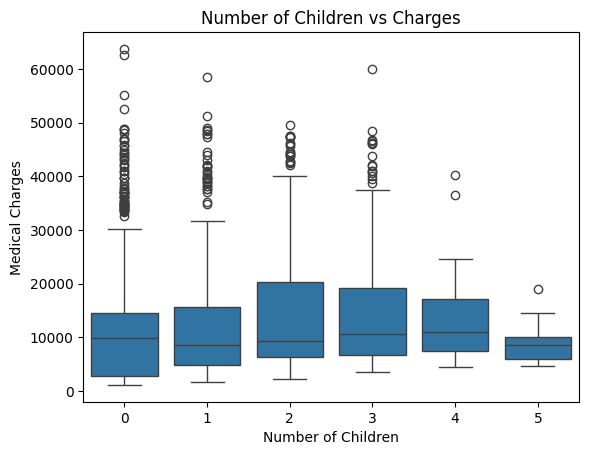

In [ ]:
sns.boxplot(x='children', y='charges', data=df)
plt.title('Number of Children vs Charges')
plt.xlabel('Number of Children')
plt.ylabel('Medical Charges')
plt.show()


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

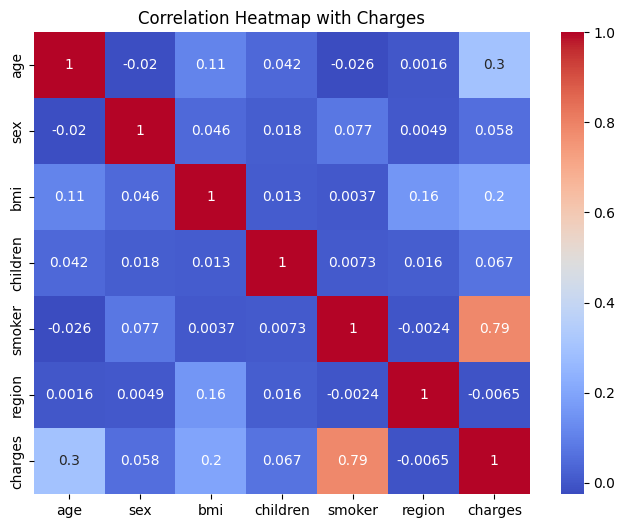

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Charges')
plt.show()


In [ ]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


| Feature      | Correlation with `charges` | Interpretation                                                                 |
| ------------ | -------------------------- | ------------------------------------------------------------------------------ |
| **smoker**   | **0.787**                  | **Strong positive correlation** – smokers tend to pay much higher charges.     |
| **age**      | 0.298                      | Moderate positive correlation – charges tend to increase with age.             |
| **bmi**      | 0.198                      | Weak to moderate positive correlation – higher BMI slightly increases charges. |
| **children** | 0.067                      | Very weak correlation – more children doesn't affect charges much.             |
| **sex**      | 0.058                      | Very weak correlation – gender has minimal impact.                             |
| **region**   | -0.007                     | **No significant correlation** .                      |


# Skewness

In [ ]:
from scipy.stats import skew as sk

skewness = df.select_dtypes(include='number').apply(sk)

def skew_category(x):
    if abs(x) < 0.5:
        return "Approximately Symmetric"
    elif 0.5 <= abs(x) < 1:
        return "Moderately Skewed"
    else:
        return "Highly Skewed"

skew_results = pd.DataFrame({
    'Skewness Value': skewness,
    'Skewness Category': skewness.apply(skew_category),
    'Direction': skewness.apply(lambda x: "Positive (Right)" if x > 0 else "Negative (Left)")
})
print(skew_results)


          Skewness Value        Skewness Category         Direction
age             0.054719  Approximately Symmetric  Positive (Right)
sex            -0.019447  Approximately Symmetric   Negative (Left)
bmi             0.283596  Approximately Symmetric  Positive (Right)
children        0.936369        Moderately Skewed  Positive (Right)
smoker          1.461959            Highly Skewed  Positive (Right)
region         -0.039024  Approximately Symmetric   Negative (Left)
charges         1.513690            Highly Skewed  Positive (Right)


In [ ]:
df['charges'] = np.log1p(df['charges'])
# As smoker is binary encoded, I will leave it as it is.


In [ ]:
from scipy.stats import skew

def check_skewness(df, cols):
    skew_data = []
    for col in cols:
        val = skew(df[col])
        if abs(val) < 0.5:
            category = "Approximately Symmetric"
        elif abs(val) < 1:
            category = "Moderately Skewed"
        else:
            category = "Highly Skewed"
        direction = "Positive (Right)" if val > 0 else "Negative (Left)"
        skew_data.append((col, round(val, 6), category, direction))

    skew_df = pd.DataFrame(skew_data, columns=["Column", "Skewness Value", "Skewness Category", "Direction"])
    return skew_df

check_skewness(df, ['charges'])


,Column,Skewness Value,Skewness Category,Direction
0,charges,-0.089458,Approximately Symmetric,Negative (Left)


## Outliers

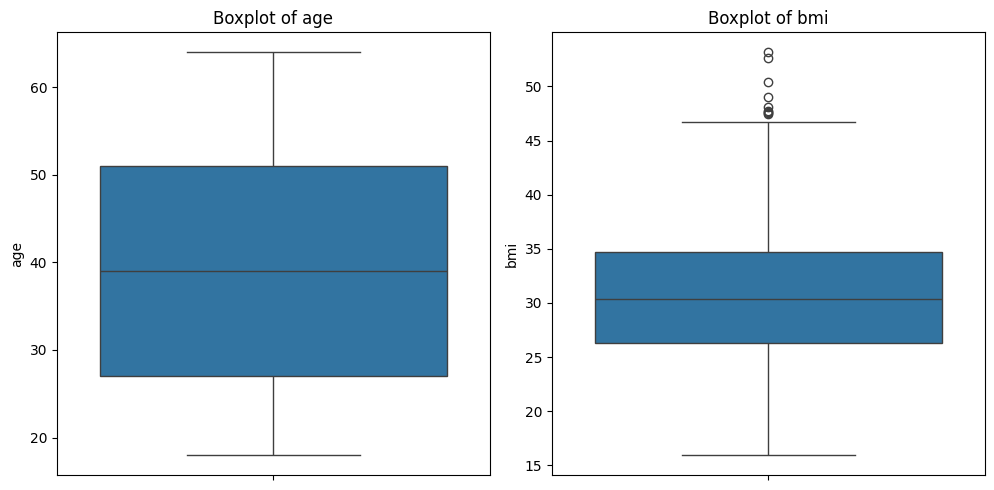

In [ ]:
features = ['age', 'bmi']

# Plot boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Apply on non-binary, non-target numeric columns
cols_to_check = ['bmi']
df_clean = remove_outliers_iqr(df, cols_to_check)


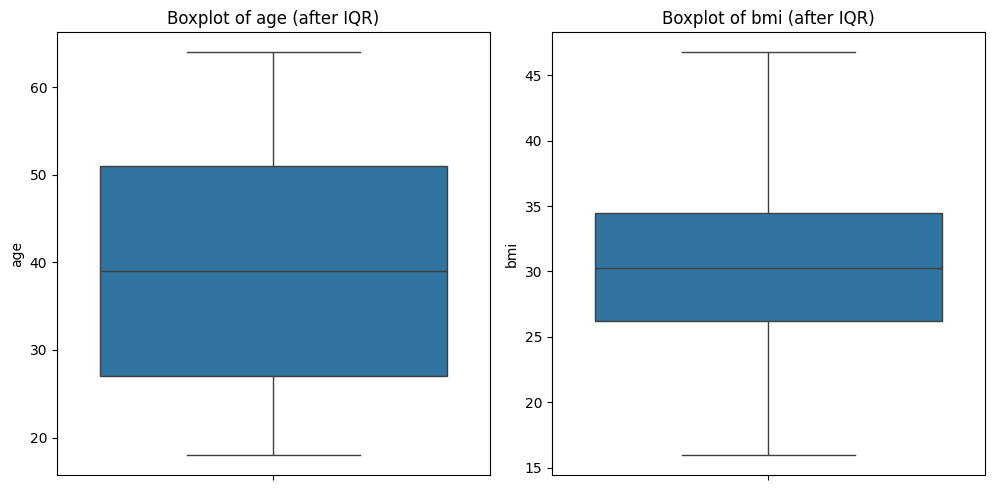

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot of {col} (after IQR)')
plt.tight_layout()
plt.show()


# Define feature X and Y

In [ ]:
X = df_clean.drop(['charges', 'region'], axis=1)
y = df_clean['charges']


# Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Scaling Feature

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Building, Evaluation & Overfitting Check

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42)
}

results = []
n_train = X_train_scaled.shape[0]
n_test = X_test_scaled.shape[0]
p = X_train_scaled.shape[1]

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Predict on train and test sets (log scale)
    y_pred_train_log = model.predict(X_train_scaled)
    y_pred_test_log = model.predict(X_test_scaled)

    # Inverse transform predictions and true values back to original scale
    y_train_orig = np.expm1(y_train)
    y_test_orig = np.expm1(y_test)
    y_pred_train = np.expm1(y_pred_train_log)
    y_pred_test = np.expm1(y_pred_test_log)

    # Train metrics on original scale
    mae_train = mean_absolute_error(y_train_orig, y_pred_train)
    mse_train = mean_squared_error(y_train_orig, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train_orig, y_pred_train)
    adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)

    # Test metrics on original scale
    mae_test = mean_absolute_error(y_test_orig, y_pred_test)
    mse_test = mean_squared_error(y_test_orig, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test_orig, y_pred_test)
    adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

    results.append({
        "Model": name,
        "Train MAE": mae_train,
        "Train MSE": mse_train,
        "Train RMSE": rmse_train,
        "Train R^2": r2_train,
        "Train Adj R^2": adj_r2_train,
        "Test MAE": mae_test,
        "Test MSE": mse_test,
        "Test RMSE": rmse_test,
        "Test R^2": r2_test,
        "Test Adj R^2": adj_r2_test
    })


# Store as DataFrame
df_results = pd.DataFrame(results)
print(df_results)


                      Model    Train MAE     Train MSE   Train RMSE  \
0         Linear Regression  4329.383879  7.321760e+07  8556.728637   
1             Decision Tree    18.023893  2.180023e+05   466.907121   
2             Random Forest   954.577282  5.336060e+06  2309.991286   
3  Support Vector Regressor  2153.632081  2.176359e+07  4665.146786   
4       K-Nearest Neighbors  2154.037624  1.892890e+07  4350.735867   
5         Gradient Boosting  1846.481977  1.777931e+07  4216.551777   
6                  AdaBoost  3104.994078  2.084345e+07  4565.463135   

   Train R^2  Train Adj R^2     Test MAE      Test MSE    Test RMSE  Test R^2  \
0   0.495193       0.492802  4163.785437  6.839734e+07  8270.268617  0.507928   
1   0.998497       0.998490  3580.475188  5.459247e+07  7388.671409  0.607245   
2   0.963210       0.963036  2349.984986  2.417695e+07  4917.005879  0.826064   
3   0.849948       0.849238  2214.601946  2.346094e+07  4843.649588  0.831215   
4   0.869492       0.86887

| Model                    | Train MAE | Train MSE | Train RMSE | Train R² | Train Adj R² | Test MAE | Test MSE | Test RMSE | Test R² | Test Adj R² | Overfitting (Y/N) |
| ------------------------ | --------- | --------- | ---------- | -------- | ------------ | -------- | -------- | --------- | ------- | ----------- | ----------------- |
| Linear Regression        | 4329.38   | 7.32e+07  | 8556.73    | 0.495    | 0.493        | 4163.79  | 6.84e+07 | 8270.27   | 0.508   | 0.498       | No                |
| Decision Tree            | 18.02     | 2.18e+05  | 466.91     | 0.998    | 0.998        | 3580.48  | 5.46e+07 | 7388.67   | 0.607   | 0.600       | Yes               |
| Random Forest            | 954.58    | 5.34e+06  | 2310.00    | 0.963    | 0.963        | 2350.00  | 2.42e+07 | 4917.01   | 0.826   | 0.823       | Yes               |
| Support Vector Regressor | 2153.63   | 2.18e+07  | 4665.15    | 0.850    | 0.849        | 2214.60  | 2.35e+07 | 4843.65   | 0.831   | 0.828       | Yes               |
| K-Nearest Neighbors      | 2154.04   | 1.89e+07  | 4350.74    | 0.869    | 0.869        | 2488.44  | 2.50e+07 | 4996.24   | 0.820   | 0.817       | Yes               |
| Gradient Boosting        | 1846.48   | 1.78e+07  | 4216.55    | 0.877    | 0.877        | 2164.78  | 2.31e+07 | 4806.61   | 0.834   | 0.831       | Yes               |
| AdaBoost                 | 3104.99   | 2.08e+07  | 4565.46    | 0.856    | 0.856        | 3150.52  | 2.20e+07 | 4688.55   | 0.842   | 0.839       | Yes               |


#Hyper Tuning

### Grid Search CV

In [462]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

# Gradient Boosting Grid Search
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='r2', n_jobs=-1)
gb_grid.fit(X_train_scaled, y_train)

# Support Vector Regressor Grid Search
svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
svr_model = SVR()
svr_grid = GridSearchCV(svr_model, svr_params, cv=5, scoring='r2', n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train)

# AdaBoost Grid Search
ada_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 1.0]
}
ada_model = AdaBoostRegressor(random_state=42)
ada_grid = GridSearchCV(ada_model, ada_params, cv=5, scoring='r2', n_jobs=-1)
ada_grid.fit(X_train_scaled, y_train)

# View best parameters
print("Best Gradient Boosting Params:", gb_grid.best_params_)
print("Best SVR Params:", svr_grid.best_params_)
print("Best AdaBoost Params:", ada_grid.best_params_)


Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best SVR Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best AdaBoost Params: {'learning_rate': 0.01, 'n_estimators': 100}


#Retrain with Best Parameters

In [463]:
# Best Gradient Boosting Regressor
best_gb = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    random_state=42
)
best_gb.fit(X_train_scaled, y_train)

# Best Support Vector Regressor (SVR)
best_svr = SVR(
    C=1,
    gamma='auto',
    kernel='rbf'
)
best_svr.fit(X_train_scaled, y_train)

# Best AdaBoost Regressor
best_ada = AdaBoostRegressor(
    learning_rate=0.01,
    n_estimators=100,
    random_state=42
)
best_ada.fit(X_train_scaled, y_train)


AdaBoostRegressor(learning_rate=0.01, n_estimators=100, random_state=42)

#Prediction and Evaluation with Best Hyper Parameters

In [464]:
def adjusted_r2(r2, n, p):
    """Calculate adjusted R-squared.
    r2: R-squared value
    n: number of samples
    p: number of predictors (features)
    """
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Predictions and true values with reverse log transform
gb_preds_orig = np.expm1(best_gb.predict(X_test_scaled))
svr_preds_orig = np.expm1(best_svr.predict(X_test_scaled))
ada_preds_orig = np.expm1(best_ada.predict(X_test_scaled))
y_true_orig = np.expm1(y_test)

n = len(y_true_orig)
p = X_test_scaled.shape[1]

# Gradient Boosting Evaluation
gb_r2 = r2_score(y_true_orig, gb_preds_orig)
print("Gradient Boosting Performance:")
print("MAE:", mean_absolute_error(y_true_orig, gb_preds_orig))
print("MSE:", mean_squared_error(y_true_orig, gb_preds_orig))
print("RMSE:", np.sqrt(mean_squared_error(y_true_orig, gb_preds_orig)))
print("R2:", gb_r2)
print("Adjusted R2:", adjusted_r2(gb_r2, n, p))

# SVR Evaluation
svr_r2 = r2_score(y_true_orig, svr_preds_orig)
print("\nSupport Vector Regressor Performance:")
print("MAE:", mean_absolute_error(y_true_orig, svr_preds_orig))
print("MSE:", mean_squared_error(y_true_orig, svr_preds_orig))
print("RMSE:", np.sqrt(mean_squared_error(y_true_orig, svr_preds_orig)))
print("R2:", svr_r2)
print("Adjusted R2:", adjusted_r2(svr_r2, n, p))

# AdaBoost Evaluation
ada_r2 = r2_score(y_true_orig, ada_preds_orig)
print("\nAdaBoost Performance:")
print("MAE:", mean_absolute_error(y_true_orig, ada_preds_orig))
print("MSE:", mean_squared_error(y_true_orig, ada_preds_orig))
print("RMSE:", np.sqrt(mean_squared_error(y_true_orig, ada_preds_orig)))
print("R2:", ada_r2)
print("Adjusted R2:", adjusted_r2(ada_r2, n, p))


Gradient Boosting Performance:
MAE: 2138.522352676402
MSE: 21432248.875105962
RMSE: 4629.497691446229
R2: 0.845809751316839
Adjusted R2: 0.8428445542267782

Support Vector Regressor Performance:
MAE: 2214.601945703205
MSE: 23460941.329274297
RMSE: 4843.649587787529
R2: 0.8312147083125934
Adjusted R2: 0.8279688373186048

AdaBoost Performance:
MAE: 2530.981339896945
MSE: 22748949.613969073
RMSE: 4769.585895438835
R2: 0.8363369976385062
Adjusted R2: 0.8331896322084775


# RandomizedSearchCV

In [465]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Gradient Boosting Random Search
gb_params = {
    'n_estimators': randint(50, 151),
    'learning_rate': uniform(0.01, 0.09),  # 0.01 to 0.1
    'max_depth': randint(3, 6)  # 3 to 5
}
gb_model = GradientBoostingRegressor(random_state=42)
gb_search = RandomizedSearchCV(gb_model, gb_params, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)
gb_search.fit(X_train_scaled, y_train)

# SVR Random Search
svr_params = {
    'C': uniform(0.1, 10),           # Continuous values between 0.1 and 10
    'gamma': ['scale', 'auto'],      # Common gamma options
    'kernel': ['linear', 'rbf', 'poly'],  # Common kernels
    'degree': randint(2, 5)          # For poly kernel only
}
svr_model = SVR()
svr_search = RandomizedSearchCV(svr_model, svr_params, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)
svr_search.fit(X_train_scaled, y_train)

# AdaBoost Random Search
ada_params = {
    'n_estimators': randint(50, 151),
    'learning_rate': uniform(0.01, 0.99)  # 0.01 to 1.0
}
ada_model = AdaBoostRegressor(random_state=42)
ada_search = RandomizedSearchCV(ada_model, ada_params, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)
ada_search.fit(X_train_scaled, y_train)

# View best parameters
print("Best Gradient Boosting Params:", gb_search.best_params_)
print("Best SVR Params:", svr_search.best_params_)
print("Best AdaBoost Params:", ada_search.best_params_)


Best Gradient Boosting Params: {'learning_rate': np.float64(0.07587945476302645), 'max_depth': 3, 'n_estimators': 70}
Best SVR Params: {'C': np.float64(1.9182496720710063), 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best AdaBoost Params: {'learning_rate': np.float64(0.03037864935284442), 'n_estimators': 51}


In [466]:
# Final Gradient Boosting Regressor
best_gb = GradientBoostingRegressor(
    learning_rate=np.float64(0.07587945476302645),
    max_depth=3,
    n_estimators=70,
    random_state=42
)
best_gb.fit(X_train_scaled, y_train)

# Final SVR
best_svr = SVR(
    C=np.float64(1.9182496720710063),
    degree=2,
    gamma='scale',
    kernel='rbf'
)
best_svr.fit(X_train_scaled, y_train)

# Final AdaBoost Regressor
best_ada = AdaBoostRegressor(
    learning_rate=np.float64(0.03037864935284442),
    n_estimators=51,
    random_state=42
)
best_ada.fit(X_train_scaled, y_train)


AdaBoostRegressor(learning_rate=np.float64(0.03037864935284442),
                  n_estimators=51, random_state=42)

In [467]:
# True values (reverse log-transform)
y_true_orig = np.expm1(y_test)

# Predictions (reverse log-transform)
gb_preds_orig = np.expm1(best_gb.predict(X_test_scaled))
svr_preds_orig = np.expm1(best_svr.predict(X_test_scaled))
ada_preds_orig = np.expm1(best_ada.predict(X_test_scaled))

# Function to calculate adjusted R^2
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Evaluation function with more metrics
def evaluate_model(name, y_true, y_pred, n_samples, n_features):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = adjusted_r2(r2, n_samples, n_features)

    print(f"\n{name} Performance:")
    print(f"MAE       : {mae:.2f}")
    print(f"MSE       : {mse:.2f}")
    print(f"RMSE      : {rmse:.2f}")
    print(f"R²        : {r2:.4f}")
    print(f"Adj. R²   : {adj_r2:.4f}")

# Number of samples and features in test set
n_samples = X_test_scaled.shape[0]
n_features = X_test_scaled.shape[1]

# Evaluate each model
evaluate_model("Gradient Boosting", y_true_orig, gb_preds_orig, n_samples, n_features)
evaluate_model("SVR", y_true_orig, svr_preds_orig, n_samples, n_features)
evaluate_model("AdaBoost", y_true_orig, ada_preds_orig, n_samples, n_features)



Gradient Boosting Performance:
MAE       : 2142.14
MSE       : 21759442.70
RMSE      : 4664.70
R²        : 0.8435
Adj. R²   : 0.8404

SVR Performance:
MAE       : 2226.83
MSE       : 23596656.86
RMSE      : 4857.64
R²        : 0.8302
Adj. R²   : 0.8270

AdaBoost Performance:
MAE       : 2578.05
MSE       : 22540871.23
RMSE      : 4747.72
R²        : 0.8378
Adj. R²   : 0.8347


| Model                                    | MAE (Test) | RMSE (Test) | R² (Test) | Adj. R² (Test) | Overfitting?      |
| ---------------------------------------- | ---------- | ----------- | --------- | -------------- | ----------------- |
| **Gradient Boosting** (GridSearch)       | 2138.52    | 4629.50     | 0.846     | 0.843          | Yes (slight)      |
| **Gradient Boosting** (RandomizedSearch) | 2142.14    | 4664.70     | 0.8435    | 0.840          | Yes (slight)      |
| **SVR** (GridSearch)                     | 2214.60    | 4843.65     | 0.831     | 0.828          | Yes (slight)      |
| **SVR** (RandomizedSearch)               | 2226.83    | 4857.64     | 0.830     | 0.827          | Yes (slight)      |
| **AdaBoost** (GridSearch)                | 2530.98    | 4769.59     | 0.836     | 0.833          | Yes (slight)      |
| **AdaBoost** (RandomizedSearch)          | 2578.05    | 4747.72     | 0.838     | 0.835          | Yes (slight)      |
| **Random Forest** (No tuning)            | 2350.00    | 4917.01     | 0.826     | 0.823          | Yes (significant) |
| **Linear Regression** (No tuning)        | 4163.79    | 8270.27     | 0.508     | 0.498          | No                |


All top models show slight overfitting (Train R² > Test R²), which is typical with complex models.

Gradient Boosting’s overfitting is minimal compared to Random Forest and Decision Tree.

The best model is the Gradient Boosting Regressor with GridSearch hyperparameters. It gives the best balance of error metrics and predictive power on test data.



Gradient Boosting (GridSearch) shows the best overall performance with:

Lowest MAE and RMSE,

Highest R² and adjusted R²,

Slight overfitting, but better generalization than other models.

# Save Model

In [468]:
import joblib

# Save the trained Gradient Boosting Regressor model
joblib.dump(best_gb, 'gradient_boosting_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [469]:
# Load model and scaler
model = joblib.load('gradient_boosting_model.pkl')
scaler = joblib.load('scaler.pkl')

def predict_charges(input_data):
    # Scale input data
    input_scaled = scaler.transform([input_data])

    # Predict on log scale
    log_pred = model.predict(input_scaled)

    # Reverse log transform
    actual_pred = np.expm1(log_pred)[0]
    return round(actual_pred, 2)


In [470]:
!pip install gradio

In [471]:
import gradio as gr

# Prediction function (no region)
def predict_charges(age, sex, bmi, children, smoker):
    # Encode inputs
    sex = 1 if sex == "male" else 0
    smoker = 1 if smoker == "yes" else 0

    # Prepare and scale input
    input_data = [age, sex, bmi, children, smoker]
    input_scaled = scaler.transform([input_data])

    # Predict and inverse log
    log_pred = model.predict(input_scaled)
    actual_pred = np.expm1(log_pred)[0]

    return round(actual_pred, 2)

# Gradio interface
iface = gr.Interface(
    fn=predict_charges,
    inputs=[
        gr.Slider(18, 65, step=1, label="Age"),
        gr.Radio(["male", "female"], label="Sex"),
        gr.Slider(15, 45, step=0.1, label="BMI"),
        gr.Slider(0, 5, step=1, label="Children"),
        gr.Radio(["yes", "no"], label="Smoker")
    ],
    outputs="number",
    title="Medical Insurance Charge Predictor",
    description="Enter patient details to predict expected medical charges."
)

# Launch the app
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d43e904a2a732448f2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
